# PROJECT : Number Recognition
Name: Tanuja Gopale
Email id :tanujawalunj1710@gmail.com, contact No.: 9356858216

Linkedin ID:  https://www.linkedin.com/in/tanuja076/

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [3]:
# Importing Data:

from tensorflow.keras.datasets import mnist

In [4]:
# Splitting dataset into training and testing format:

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# 10,000 images for testing:

X_test.shape

(10000, 28, 28)

In [7]:
# Output labels of images:

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# Using suffling method for keeping randomness in image selection:

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

(-0.5, 27.5, 27.5, -0.5)

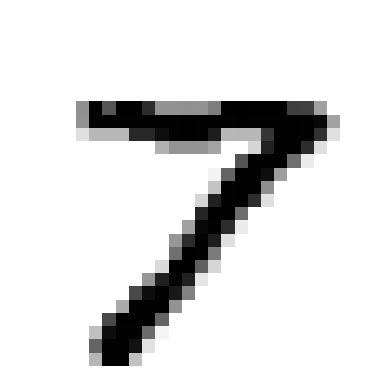

In [9]:
# Displaying image by using matplot:

plt.imshow(X_train[4000], cmap="binary")
plt.axis("off")

In [10]:
# Pixel values for the selected images:

X_train[4000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
# Normalizing pixel values of all images:

X_train = X_train/255
X_test = X_test/255

In [12]:
# Here we can see the difference, all values are between 0 to 1:

X_train[4000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
# Neural Network:

model = Sequential()
model.add(Flatten(input_shape=(28,28)))     # Image format in 28X28 pixels
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))     # Hidden Layers
model.add(Dropout(0.2))                     # To reduce Noise
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))   # For Multiclass classification

In [14]:
# Model summary:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [15]:
# Compiling a model by giving loss funtions and all:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
750/750 [==============================] - 8s 7ms/step - loss: 0.4824 - accuracy: 0.8505 - val_loss: 0.1825 - val_accuracy: 0.9447
Epoch 2/25
750/750 [==============================] - 5s 7ms/step - loss: 0.2349 - accuracy: 0.9293 - val_loss: 0.1299 - val_accuracy: 0.9607
Epoch 3/25
750/750 [==============================] - 5s 7ms/step - loss: 0.1873 - accuracy: 0.9421 - val_loss: 0.1118 - val_accuracy: 0.9656
Epoch 4/25
750/750 [==============================] - 5s 6ms/step - loss: 0.1602 - accuracy: 0.9510 - val_loss: 0.1025 - val_accuracy: 0.9697
Epoch 5/25
750/750 [==============================] - 5s 7ms/step - loss: 0.1436 - accuracy: 0.9558 - val_loss: 0.0883 - val_accuracy: 0.9730
Epoch 6/25
750/750 [==============================] - 5s 7ms/step - loss: 0.1271 - accuracy: 0.9608 - val_loss: 0.0845 - val_accuracy: 0.9744
Epoch 7/25
750/750 [==============================] - 5s 7ms/step - loss: 0.1194 - accuracy: 0.9627 - val_loss: 0.0833 - val_accuracy: 0.9754
Epoch 

In [17]:
# Running created model on test image dataset:

y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
# Showing maximum possibility of label will occure:

y_prob

array([[1.91827731e-09, 3.24514804e-10, 2.82573524e-06, ...,
        9.99967575e-01, 1.20914390e-08, 1.02651948e-05],
       [2.77497955e-11, 1.78132165e-09, 1.00000000e+00, ...,
        4.12712781e-11, 4.32463398e-10, 4.11291681e-20],
       [3.65725561e-10, 9.99972820e-01, 2.09421614e-07, ...,
        4.30013370e-06, 2.09812461e-05, 5.17933856e-08],
       ...,
       [1.65267241e-14, 5.22621113e-10, 4.64476756e-11, ...,
        2.08097063e-07, 6.40902131e-09, 3.45900787e-07],
       [3.10826256e-12, 3.92357501e-11, 3.41669776e-15, ...,
        1.72680516e-11, 1.26155976e-06, 1.65835892e-13],
       [1.62953800e-11, 2.15032032e-16, 7.96586755e-13, ...,
        2.57784712e-19, 1.00068946e-10, 2.04355434e-16]], dtype=float32)

In [19]:
# Return the indices of the max elements by using argmax function:

y_pred = y_prob.argmax(axis=1)

In [20]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
# Accuracy of model for testing:

from sklearn.metrics import accuracy_score
print(f"Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9803


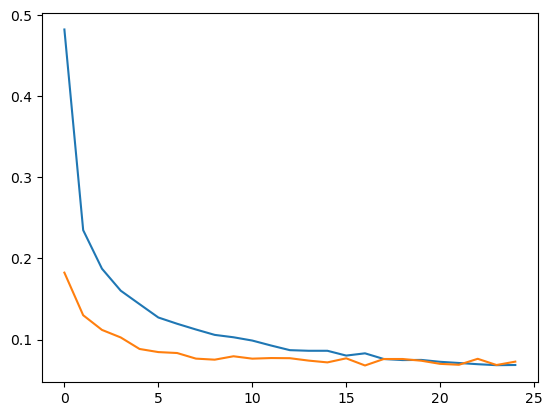

In [22]:
# Plotting a result of loss and val_loss of model:

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

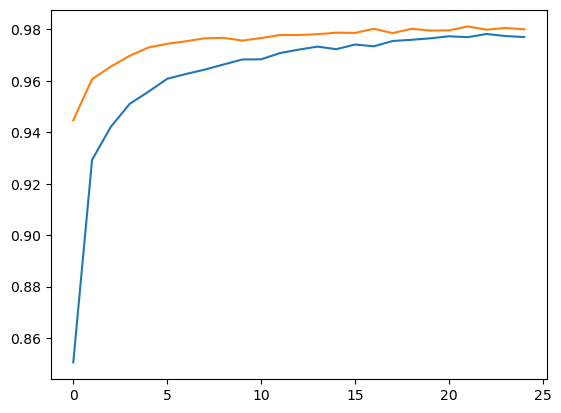

In [23]:
# Plotting a result of accuracy and val_accuracy of model:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])


(-0.5, 27.5, 27.5, -0.5)

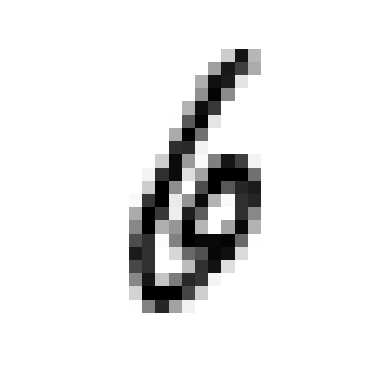

In [24]:
# Displaying random image by selecting:

plt.imshow(X_test[1908], cmap="binary")
plt.axis("off")


In [25]:
# Will show the prediction of the image we choose earliar:

Predicted_Number = model.predict(np.array([X_test[1908]]))
Predicted_Number = np.argmax(Predicted_Number,axis=1)
print(f"Predicted Number:",Predicted_Number)


1/1 [==============================] - 0s 45ms/step
Predicted Number: [6]
